<a href="https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/4.%20%D0%A0%D0%B5%D1%88%D0%B0%D1%8E%D1%89%D0%B8%D0%B5%20%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D1%8F/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%20%E2%84%967.%20%D0%A0%D0%B5%D1%88%D0%B0%D1%8E%D1%89%D0%B8%D0%B5_%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *0. Ознакомиться с [блокнотом](https://colab.research.google.com/drive/1PwN8igT5w2xArBGmM6rvO9pVRQMh-FQn?usp=sharing)

# 1. Дерево решений для классификации

In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

### Получение данных

Будем работать с набором данных для задачи классификации - данные по сердечно сосудистым заболеваниям, довольно стандартный набор для изучения машинного обучения, но его нет в `sklearn'e`. Поэтому скачиваем данные со стороны, с google диска.

Ссылка на google drive: https://drive.google.com/file/d/1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G


In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G' -O cardio.csv

--2023-10-31 17:11:58--  https://drive.google.com/uc?export=download&id=1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G
Распознаётся drive.google.com (drive.google.com)… 142.250.150.194
Подключение к drive.google.com (drive.google.com)|142.250.150.194|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 303 See Other
Адрес: https://doc-00-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bnbupj1h0048f4tt483utth7ibklhmt5/1698761475000/14904333240138417226/*/1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G?e=download&uuid=5b32f8ae-d39d-4996-8082-1562ee92cc26 [переход]
Предупреждение: в HTTP маски не поддерживаются.
--2023-10-31 17:11:59--  https://doc-00-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bnbupj1h0048f4tt483utth7ibklhmt5/1698761475000/14904333240138417226/*/1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G?e=download&uuid=5b32f8ae-d39d-4996-8082-1562ee92cc26
Распознаётся doc-00-c0-docs.googleusercontent.com (doc-00-c0-docs.googleusercontent.com)

В задаче предалагается предсказать наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра. Датасет сформирован 3 групп признаков:

Объективные признаки:
- Возраст (в днях)
- Рост
- Вес
- Пол

Результаты измерения:

- Артериальное давление верхнее и нижнее
- Холестерин (три группы: норма, выше нормы, значительно выше нормы)
- Глюкоза (три группы: норма, выше нормы, значительно выше нормы)

Субъективные признаки (бинарные):

- Курение
- Употребление Алкоголя
- Физическая активность

In [2]:
import pandas as pd
df = pd.read_csv('./cardio.csv', delimiter=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
full_features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
                 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
target = 'cardio'

In [4]:
df['age'] = round(df['age'] / 365)

## 1. Вводная

### 1.1 Сколько вопросов будет задано на первом этапе

Посчитайте, сколько вопросов задаст дерево решений в самый первый раз, если использовать все признаки из списка full_features.

Первичное количество вопросов зависит от количества признаков в датасете. Их у нас 11. Соответственно вопросов будет 11.

In [5]:
X = df[full_features]  # Признаки
Y = df[target]  # Целевая переменная

In [6]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=1)
tree.fit(X, Y)

DecisionTreeClassifier(random_state=1)

In [7]:
first_stage_questions = tree.tree_.node_count
print(f"Будет задано {first_stage_questions} вопросов.")

first_node_features = tree.tree_.n_features
print(f"Количество признаков в корне дерева: {first_node_features}")

Будет задано 46409 вопросов.
Количество признаков в корне дерева: 11


### 1.2 Упростите задачу

Вопросов получилось достаточно, не будет моделировать столько вопросов, а попробуем уменьшить их количество.

Возьмите только два признака: weight и gluc.
А так же возьмите только 10 первых объектов.

In [8]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

selected_features = ["weight", "gluc"]
data_subset = df[selected_features].head(10)
target_subset = df[target].head(10)

model_subset = DecisionTreeClassifier(random_state=42)
model_subset.fit(data_subset, target_subset)

DecisionTreeClassifier(random_state=42)

### 1.3 Посчитайте еще раз, сколько будет вопросов

In [9]:
total_nodes = model_subset.tree_.node_count
print(f"Общее количество узлов в дереве решений: {total_nodes}")

Общее количество узлов в дереве решений: 11


С таким количеством вопросов уже можем работать и разбираться в устройству дерева решений.

## 2. Устройство дерева решений

### 2.1 Обучите дерево решений

Обучите дерево решений из sklearn'a с атрибутом `random_state=1`.

In [10]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

selected_features = ["weight", "gluc"]
data_subset = df[selected_features].head(10)
target_subset = df[target].head(10)

model_subset = DecisionTreeClassifier(random_state=1)
model_subset.fit(data_subset, target_subset)

DecisionTreeClassifier(random_state=1)

### 2.2 Отрисуйте обученное дерево решений

Нарисуйте дерево решений, которое у вас получилось после обучения. Сделайте отрисовку такой, чтобы можно было понять, какие вопросы задаются

[Text(0.5, 0.875, 'weight <= 76.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.3, 0.625, 'weight <= 65.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.2, 0.375, 'weight <= 63.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.1, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7, 0.625, 'weight <= 89.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.375, 'gluc <= 2.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

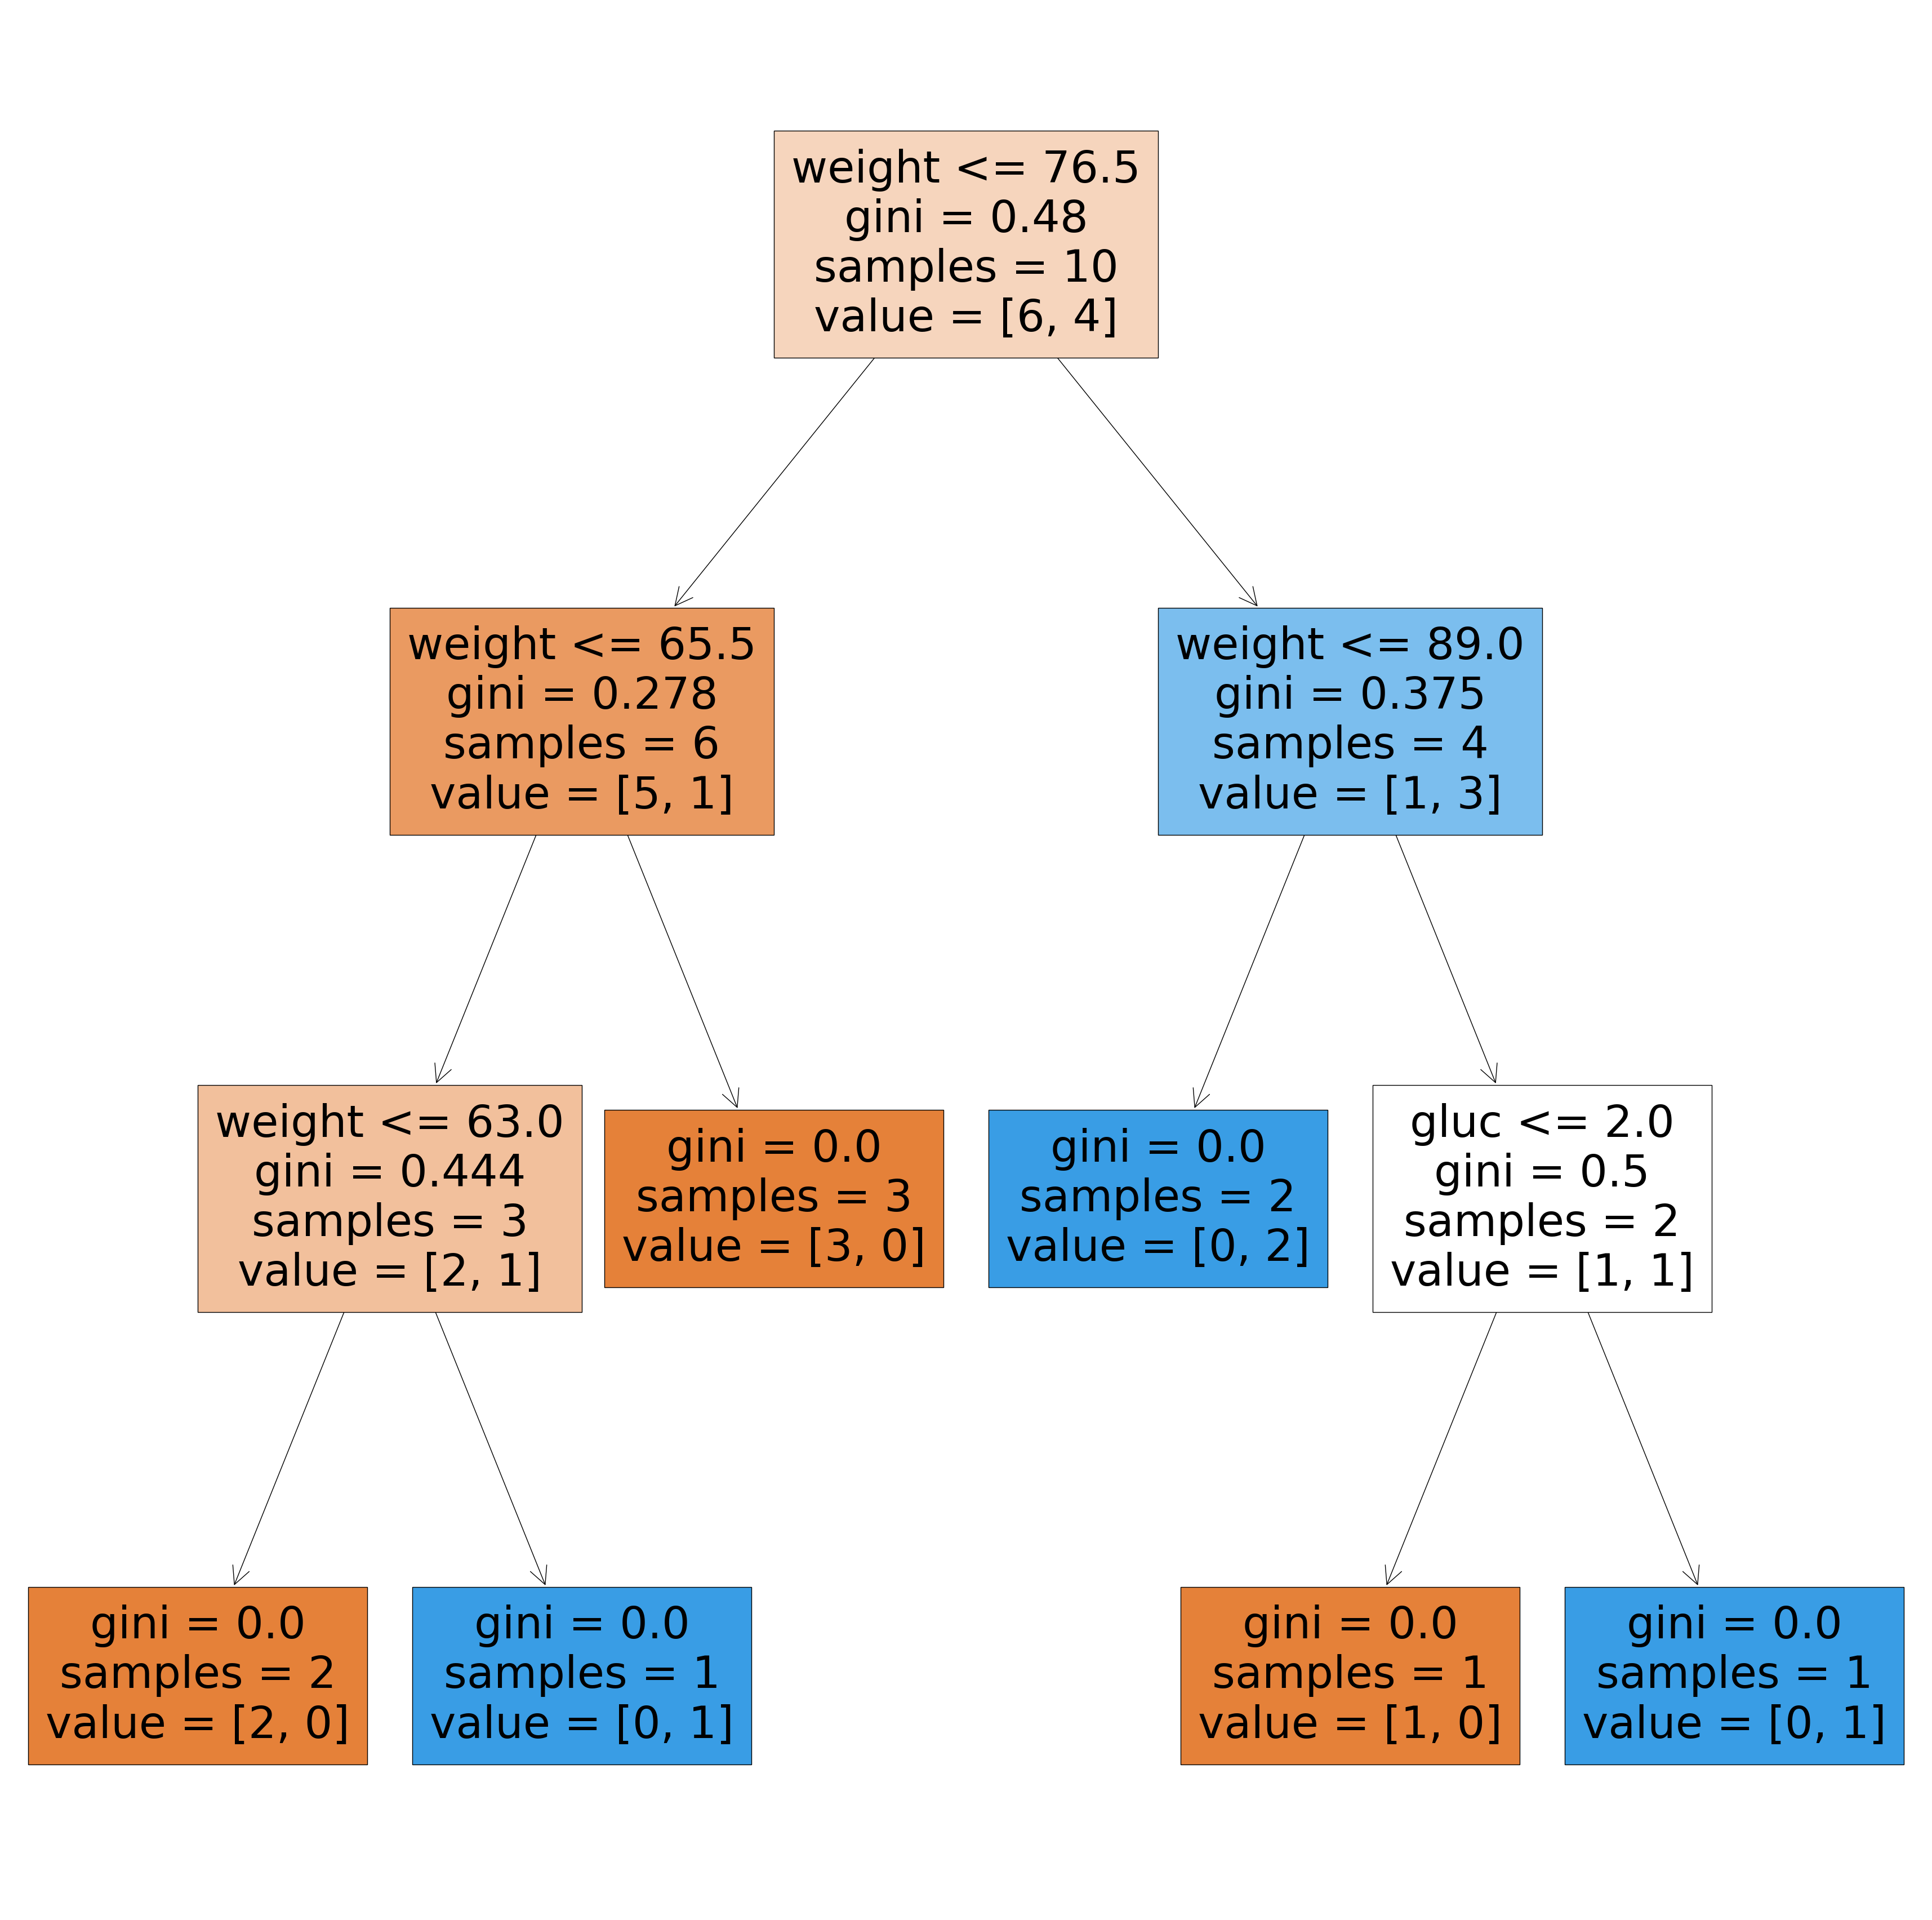

In [11]:
from sklearn.tree import plot_tree

plt.figure(figsize=(44, 44))
plot_tree(model_subset, feature_names=selected_features, filled=True)

### 2.3 Посчитайте, сколько вершин получилось

In [12]:
total_nodes = model_subset.tree_.node_count
print(f"Общее количество узлов в дереве решений: {total_nodes}")

Общее количество узлов в дереве решений: 11


### 2.4 Посчитайте, сколько листов получилось

In [13]:
num_leaves = model_subset.get_n_leaves()
print(f"Количество листов в обученном дереве решений: {num_leaves}")

Количество листов в обученном дереве решений: 6


### 2.5 Посмотрите, почему не получилось сделать разбиение ещё на два узла в крайнем левом узле.

В узле, где
```
gini=0.5
samples=2
value=[1, 1]
```

In [14]:
from sklearn.metrics import accuracy_score

X_remaining = df[selected_features].iloc[10:]
y_remaining = df[target].iloc[10:]

y_pred_remaining = model_subset.predict(X_remaining)
accuracy_remaining = accuracy_score(y_remaining, y_pred_remaining)

print(f"Точность модели дерева решений на оставшихся данных: {accuracy_remaining:.2f}")

Точность модели дерева решений на оставшихся данных: 0.53


## 3. Вспомогательные функции

Для того, что бы дальше сравнивать между собой объекты нужно реализовать две вспомогательные функции.

### 3.1 Функция подсчета критерия Джини

Функция должна принимать список целевых значений, считать критерий информативности и выдавать одно значение - критерий Джини.

In [15]:
import numpy as np

def gini_impurity(target_values):
    total_samples = len(target_values)
    if total_samples == 0:
        return 0.0

    # Рассчитайте критерий Джини
    unique_classes, class_counts = np.unique(target_values, return_counts=True)
    class_probabilities = class_counts / total_samples

    gini = 1.0 - np.sum(class_probabilities ** 2)

    return gini

### 3.2 Проверка функции gini

Посчитайте критерий информативности в исходной выборке и вы должны получить точно такое же значение, как и было на визуализации дерева решений в его корне.

In [16]:
gini = gini_impurity(target_subset.values)

print(f"Критерий Джини, рассчитанный функцией на подмножестве данных: {gini:.2f}")

Критерий Джини, рассчитанный функцией на подмножестве данных: 0.48


### 3.3 Функция подсчета прироста информации

Функция должна принимать целевые значения левой подвыборки, правой подвыборки и исходной вершины, а выдавать должна одно значение - прирост информации, подсчитанный на критерии информативности Джини.

In [17]:
import numpy as np

def gini_impurity(target_values):
    total_samples = len(target_values)
    if total_samples == 0:
        return 0.0

    unique_classes, class_counts = np.unique(target_values, return_counts=True)
    class_probabilities = class_counts / total_samples
    
    gini = 1.0 - np.sum(class_probabilities ** 2)

    return gini

def information_gain(left_target, right_target, original_target):
    original_gini = gini_impurity(original_target)

    left_weight = len(left_target) / (len(left_target) + len(right_target))
    right_weight = len(right_target) / (len(left_target) + len(right_target))
    weighted_gini = (left_weight * gini_impurity(left_target)) + (right_weight * gini_impurity(right_target))

    gain = original_gini - weighted_gini

    return gain

In [18]:
original_target = np.array([1, 1, 0, 1, 0, 0])
left_target = np.array([1, 0])
right_target = np.array([1, 0, 0])

gain = information_gain(left_target, right_target, original_target)
print(f"Прирост информации: {gain:.2f}")

Прирост информации: 0.03


Теперь вспомогательные функции готовы можем моделировать работу обученного дерева решений.

## 4. Процесс построения дерева решений

### 4.1 Получение первого вопроса


4.1.1 Пройдитесь по всем возможным вопросам для исходного набора данных


Можете сохранять полученные значения прироста информации в датафрейм в удобную для вас структуру данных.

In [19]:
import pandas as pd
import numpy as np

information_gains = pd.DataFrame(columns=['Feature', 'Split Value', 'Information Gain'])
original_target = df[target].values

for feature in full_features:
    unique_values = np.unique(df[feature].values)

    for value in unique_values:

        left_indices = df[feature] <= value
        right_indices = df[feature] > value
        
        left_target = original_target[left_indices]
        right_target = original_target[right_indices]
        

        gain = information_gain(left_target, right_target, original_target)

        result_df = pd.DataFrame({'Feature': [feature], 'Split Value': [value], 'Information Gain': [gain]})

        information_gains = pd.concat([information_gains, result_df], ignore_index=True)

print(information_gains)

/var/folders/g4/8knhvm1x3kl_l8l6srb3__j00000gn/T/ipykernel_69128/2056702547.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  information_gains = pd.concat([information_gains, result_df], ignore_index=True)


    Feature  Split Value  Information Gain
0       age         30.0          0.000029
1       age         39.0          0.000926
2       age         40.0          0.006787
3       age         41.0          0.008039
4       age         42.0          0.011750
..      ...          ...               ...
743   smoke          1.0          0.000000
744    alco          0.0          0.000027
745    alco          1.0          0.000000
746  active          0.0          0.000636
747  active          1.0          0.000000

[748 rows x 3 columns]


4.1.2 Найдите самый лучший вопрос, опираясь на прирост информации

In [20]:
information_gains_sorted = information_gains.sort_values(by='Information Gain', ascending=False)
best_question = information_gains_sorted.iloc[0]

print("Самый лучший вопрос:")
print(best_question)

Самый лучший вопрос:
Feature                ap_hi
Split Value            129.0
Information Gain    0.094549
Name: 482, dtype: object


4.1.3. Сделайте разбиение по этому вопросу исходных данных на две подвыборки df_left и df_right


In [21]:
best_feature = best_question['Feature']
split_value = best_question['Split Value']

df_left = df[df[best_feature] <= split_value]
df_right = df[df[best_feature] > split_value]

4.1.4. Проверьте себя через визуализацию дерева решений

In [45]:
![1](output.png)

/bin/bash: -c: line 0: syntax error near unexpected token `output.png'
/bin/bash: -c: line 0: `[1](output.png)'


### 4.2 Получение второго вопроса


4.2.1. Глядя на df_left и df_right, посмотрите, где можно сделать ещё разбиение

In [22]:
import pandas as pd
import numpy as np

information_gains_left = pd.DataFrame(columns=['Feature', 'Split Value', 'Information Gain'])
original_target = df_left[target].values

for feature in full_features:
    unique_values = np.unique(df_left[feature].values)
    
    for value in unique_values:
        left_indices = df_left[feature] <= value
        right_indices = df_left[feature] > value
        
        left_target = original_target[left_indices]
        right_target = original_target[right_indices]

        gain = information_gain(left_target, right_target, original_target)
        
        result_df = pd.DataFrame({'Feature': [feature], 'Split Value': [value], 'Information Gain': [gain]})
        
        information_gains_left = pd.concat([information_gains_left, result_df], ignore_index=True)

print(information_gains_left)

/var/folders/g4/8knhvm1x3kl_l8l6srb3__j00000gn/T/ipykernel_69128/612040695.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  information_gains_left = pd.concat([information_gains_left, result_df], ignore_index=True)


    Feature  Split Value  Information Gain
0       age         30.0          0.000020
1       age         39.0          0.000699
2       age         40.0          0.005390
3       age         41.0          0.006464
4       age         42.0          0.009373
..      ...          ...               ...
497   smoke          1.0          0.000000
498    alco          0.0          0.000462
499    alco          1.0          0.000000
500  active          0.0          0.001610
501  active          1.0          0.000000

[502 rows x 3 columns]


4.2.2. Пройдитесь по всем признакам в выбранной подвыборке

In [23]:
import pandas as pd
import numpy as np

information_gains_right = pd.DataFrame(columns=['Feature', 'Split Value', 'Information Gain'])

original_target = df_right[target].values

for feature in full_features:
    unique_values = np.unique(df_right[feature].values)
    

    for value in unique_values:
        left_indices = df_right[feature] <= value
        right_indices = df_right[feature] > value
        
        left_target = original_target[left_indices]
        right_target = original_target[right_indices]
        
        gain = information_gain(left_target, right_target, original_target)
        
        result_df = pd.DataFrame({'Feature': [feature], 'Split Value': [value], 'Information Gain': [gain]})
        
        information_gains_right = pd.concat([information_gains_right, result_df], ignore_index=True)

print(information_gains_right)

/var/folders/g4/8knhvm1x3kl_l8l6srb3__j00000gn/T/ipykernel_69128/3297431503.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  information_gains_right = pd.concat([information_gains_right, result_df], ignore_index=True)


    Feature  Split Value  Information Gain
0       age         39.0          0.000157
1       age         40.0          0.000288
2       age         41.0          0.000328
3       age         42.0          0.000338
4       age         43.0          0.000235
..      ...          ...               ...
562   smoke          1.0          0.000000
563    alco          0.0          0.000109
564    alco          1.0          0.000000
565  active          0.0          0.000026
566  active          1.0          0.000000

[567 rows x 3 columns]


4.2.3 Найдите самый лучший вопрос, опираясь на прирост информации

In [24]:
information_gains_sorted_right = information_gains_right.sort_values(by='Information Gain', ascending=False)

best_question_right = information_gains_sorted_right.iloc[0]

print("Самый лучший вопрос (правый):")
print(best_question_right)

Самый лучший вопрос (правый):
Feature                ap_hi
Split Value            138.0
Information Gain    0.025114
Name: 341, dtype: object


4.2.4. Сделайте разбиение по этому вопросу исходных данных на две подвыборки df_left и df_right


In [25]:
information_gains_sorted_left = information_gains_left.sort_values(by='Information Gain', ascending=False)

best_question_left = information_gains_sorted_left.iloc[0]

print("Самый лучший вопрос (левый):")
print(best_question_left)

Самый лучший вопрос (левый):
Feature                  age
Split Value             54.0
Information Gain    0.020176
Name: 16, dtype: object


In [26]:
best_feature_left = best_question_left['Feature']
split_value_left = best_question_left['Split Value']

best_feature_right = best_question_right['Feature']
split_value_right = best_question_right['Split Value']

# Разделение исходных данных на две подвыборки: df_left и df_right
df_left = df[df[best_feature_left] <= split_value_left]
df_right = df[df[best_feature_right] <= split_value_right]

4.2.5. Проверьте себя через визуализацию дерева решений

![1](output.png)

# 2. Дерево решений для регрессии

In [27]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

### 1. Получение данных load_breat_cancer

Будем работать с набором данных для задачи регрессии `load_diabetes`, который можно получить из стандартных датасетов в `sklearn'e`.

После `load_diabetes()` возвращается словарь с данными (`data`), целевой переменной (`target`), названиями характеристик в данных (`feature_names`) и описанием данных (`DESCR`).

In [28]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [29]:
X = data.data
features = data.feature_names
y = data.target

Из признаков (характеристик данных) и целевой переменной сформируем датафрейм, в качестве названий колонок возьмем названия признаков.

In [30]:
df = pd.DataFrame(X, columns=features)
df['target'] = y

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Разобьем выборку на две: обучающую и тестовую.

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features],
    df['target'],
    test_size=0.2,
    shuffle=True,
    random_state=3
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((353, 10), (353,), (89, 10), (89,))

### 1.1. Обучение дерева решений

1. Инициализируйте дерево решений для задачи регрессии
2. Обучите его на обучающей выборке

In [32]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(random_state=1)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

### 1.2. Получение метрик качества
Узнаем, насколько дерево решений обучилось хорошо, для этого
1. Сделайте предсказания моделью для обучающей выборки
2. Сделайте предсказания моделью для тестовой выборки
3. Посчитайте метрику качества средне-квадратичная ошибка
4. Посчитайте метрику качества коэффициент детерминации

In [33]:
y_train_pred = reg_tree.predict(X_train)
y_test_pred = reg_tree.predict(X_test)

Сделайте вывод, насколько хорошо обучилась модель

In [34]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("MSE (обучение):", mse_train)
print("MSE (тест):", mse_test)

from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R2 (обучение):", r2_train)
print("R2 (тест):", r2_test)

MSE (обучение): 0.0
MSE (тест): 5897.134831460674
R2 (обучение): 1.0
R2 (тест): -0.08909766517566808


### 1.3. Изменение метрики

Попробуйте поизменять известные параметры для того, чтобы метрика стала лучше.

In [35]:
reg_tree = DecisionTreeRegressor(criterion="poisson", max_depth=8, min_samples_leaf=40, random_state=1)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=8, min_samples_leaf=40,
                      random_state=1)

In [36]:
y_train_pred = reg_tree.predict(X_train)
y_test_pred = reg_tree.predict(X_test)

from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("MSE (обучение):", mse_train)
print("MSE (тест):", mse_test)

from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R2 (обучение):", r2_train)
print("R2 (тест):", r2_test)


MSE (обучение): 3167.7977287363933
MSE (тест): 3214.9311195147966
R2 (обучение): 0.4763639240819252
R2 (тест): 0.4062584499027134


### 2. Получение данных make_regression

Для второго примера возьмем самодельный набор данных для задачи регрессии `make_regression`, который можно получить из стандартных датасетов в `sklearn'e`.

Сгенерируем себе 100к объектов, которые описываются 20 признаками, из них 12 будут дейтсвительно полезными.

In [37]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100_000, n_features=20, n_informative=12, random_state=10)

In [38]:
X.shape, y.shape

((100000, 20), (100000,))

Разобьем выборку на две: обучающую и тестовую.

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=3
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80000, 20), (80000,), (20000, 20), (20000,))

### 2.1. Обучение дерева решений

1. Инициализируйте дерево решений для задачи регрессии
2. Обучите его на обучающей выборке

In [40]:
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(criterion="squared_error", max_depth=5, min_samples_leaf=2, random_state=1)

In [41]:
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=2, random_state=1)

### 2.2. Получение метрик качества
Узнаем, насколько дерево решений обучилось хорошо, для этого
1. Сделайте предсказания моделью для обучающей выборки
2. Сделайте предсказания моделью для тестовой выборки
3. Посчитайте метрику качества средне-квадратичная ошибка
4. Посчитайте метрику качества коэффициент детерминации

In [42]:
y_train_pred = reg_tree.predict(X_train)
y_test_pred = reg_tree.predict(X_test)

from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("MSE (обучение):", mse_train)
print("MSE (тест):", mse_test)

from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R2 (обучение):", r2_train)
print("R2 (тест):", r2_test)

MSE (обучение): 27785.177141947202
MSE (тест): 28404.350366594077
R2 (обучение): 0.4859082392067524
R2 (тест): 0.4738762029658744


Сделайте вывод, насколько хорошо обучилась модель

### 2.3. Перебор гиперпараметров

Осуществите перебор параметров для получения лучших результатов (GridSearchCV, см. подход из п.0).

In [43]:
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(criterion="friedman_mse", max_depth=25, min_samples_leaf=20, random_state=1)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=25,
                      min_samples_leaf=20, random_state=1)

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Создайте модель DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(criterion="squared_error", max_depth=5, min_samples_leaf=2, random_state=1)

# Определите сетку гиперпараметров для перебора
param_grid = {
    "criterion" :["squared_error",'friedman_mse'],
    'max_depth': [5,10,15,20]
}

# Создайте экземпляр GridSearchCV
grid_search = GridSearchCV(reg_tree, param_grid, cv=5)

# Обучите модель на обучающей выборке
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=5, min_samples_leaf=2,
                                             random_state=1),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [5, 10, 15, 20]})

In [ ]:
# Наилучшие параметры
best_params = grid_search.best_params_
print("Наилучшие параметры:", best_params)

# Лучшая модель
best_model = grid_search.best_estimator_

# Предсказания
y_test_pred = best_model.predict(X_test)

# Оценка производительности
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("MSE (тест):", mse_test)
print("MAE (тест):", mae_test)
print("R2 (тест):", r2_test)